# Hackathon data « Make-it-isi» à destination des employeurs publics

## Vis'Avenir : Facilitez votre Avenir

## 1. Librairies

In [159]:
import pandas as pd
pd.set_option('max_colwidth',150)

import gensim
import re


import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('french')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/siwar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/siwar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2. Data

### 1er Fichier: répertoir compétences => emploi et compétences correspondants

In [2]:
xls = pd.ExcelFile('../data/repertoire_competences.xlsx') 
df1 = pd.read_excel(xls, 'SAVOIR FAIRE MINISTERE') 
df2 = pd.read_excel(xls, 'SAVOIR ETRE MINISTERE') 

In [3]:
df1.head()

,Ministère,code_emploi,savoir_faire,code_SF,Niveau de mise en œuvre,savoir_faire_DICO
0,CULCOM,EPP01,"Mémoriser, synthétiser et exploiter des dossiers complexes",CULCOMSF01,NaN,NaN
1,CULCOM,EPP01,Concevoir et proposer des solutions innovantes et durables ainsi que les préalables à leur mise en œuvre,CULCOMSF02,NaN,NaN
2,CULCOM,EPP01,"Discerner les enjeux, anticiper et prendre des initiatives dans des domaines sensibles et dans l’urgence",CULCOMSF03,NaN,NaN
3,CULCOM,EPP01,Prendre des responsabilités,CULCOMSF04,NaN,NaN
4,CULCOM,EPP01,"Faire preuve de discrétion, d’indépendance d’esprit et de jugement",CULCOMSF05,NaN,NaN


In [4]:
df2.head()

,Ministère,code_emploi,savoir_etre,Code_SE
0,CULCOM,EPP01,Être rigoureux,CULCOMSE01
1,CULCOM,EPP01,Sens des relations humaines,CULCOMSE02
2,CULCOM,EPP01,Avoir l’esprit d’équipe,CULCOMSE03
3,CULCOM,EPP01,Être à l’écoute,CULCOMSE04
4,CULCOM,EPP01,Faire preuve de diplomatie,CULCOMSE05


In [5]:
df2.nunique()

Ministère        12
code_emploi    1185
savoir_etre     566
Code_SE         637
dtype: int64

In [6]:
df2.shape

(7400, 4)

In [7]:
df1 = df1[["Ministère","code_emploi","savoir_faire","code_SF"]]
df2 = df2[["Ministère","code_emploi","savoir_etre","Code_SE"]]

df1 = df1.groupby(['code_emploi', 'Ministère'])["savoir_faire"].apply(lambda x: ','.join(x.astype(str))).reset_index()
df2 = df2.groupby(['code_emploi','Ministère'])["savoir_etre"].apply(lambda x: ','.join(x.astype(str))).reset_index()

In [8]:
df2.head()

,code_emploi,Ministère,savoir_etre
0,1,PJJ,"Sens de l'analyse,Esprit de synthèse,Etre rigoureux,Curiosité intellectuelle,Sens des relations humaines,Etre à l'écoute,Capacité d'adaptation,Maî..."
1,2,PJJ,"Sens de l'analyse,Esprit de synthèse,Sens de l'innovation,Etre rigoureux,Faire preuve de diplomatie,Faire preuve d'autorité,Capacité d'adaptation,..."
2,3,PJJ,"Sens de l'analyse,Esprit de synthèse,Etre rigoureux,Sens de l'initiative,Sens des relations humaines,Faire preuve de diplomatie,Faire preuve d'aut..."
3,4,PJJ,"Esprit de synthèse,Etre autonome,Sens de l’initiative,Etre persévérant,Sens des relations humaines,Etre à l'écoute,Faire preuve d’autorité,Capacit..."
4,5,PJJ,"Esprit de synthèse,Sens de l'innovation,Etre autonome,Sens de l'initiative,Sens des relations humaines,Sens de la pédagogie,Sens de l'organisation"


In [9]:
df2.shape

(1363, 3)

In [10]:
df2.nunique()

code_emploi    1185
Ministère        12
savoir_etre     965
dtype: int64

In [11]:
df_merged1 = pd.merge(df1, df2, on=['code_emploi', 'Ministère'], how='inner')
df_merged1.head()

,code_emploi,Ministère,savoir_faire,savoir_etre
0,1,PJJ,"Diagnostiquer (Contribution à la programmation stratégique nationale),Concevoir un projet, une démarche (Contribution à la programmation stratégiq...","Sens de l'analyse,Esprit de synthèse,Etre rigoureux,Curiosité intellectuelle,Sens des relations humaines,Etre à l'écoute,Capacité d'adaptation,Maî..."
1,2,PJJ,"Concevoir un projet (Conduite de la politique territoriale),Analyser un projet (Conduite de la politique territoriale),Anticiper (Conduite de la p...","Sens de l'analyse,Esprit de synthèse,Sens de l'innovation,Etre rigoureux,Faire preuve de diplomatie,Faire preuve d'autorité,Capacité d'adaptation,..."
2,3,PJJ,"Travailler en équipe (Pilotage et contrôle de l'activité de son établissement ou service),Utiliser les outils de pilotage (Pilotage et contrôle de...","Sens de l'analyse,Esprit de synthèse,Etre rigoureux,Sens de l'initiative,Sens des relations humaines,Faire preuve de diplomatie,Faire preuve d'aut..."
3,4,PJJ,"Travailler en mode projet (Organisation du cadre d’intervention pédagogique de l’unité),Elaborer une méthode (Organisation du cadre d’intervention...","Esprit de synthèse,Etre autonome,Sens de l’initiative,Etre persévérant,Sens des relations humaines,Etre à l'écoute,Faire preuve d’autorité,Capacit..."
4,5,PJJ,"Communiquer (Contribution à l'élaboration de la politique interrégionale),Elaborer (Contribution à l'élaboration de la politique interrégionale),E...","Esprit de synthèse,Sens de l'innovation,Etre autonome,Sens de l'initiative,Sens des relations humaines,Sens de la pédagogie,Sens de l'organisation"


In [12]:
df_merged1.shape

(1357, 4)

In [13]:
df_merged1.nunique()

code_emploi     1179
Ministère         12
savoir_faire    1121
savoir_etre      961
dtype: int64

### 2eme Fichier: Filière métier + Emplois types

In [14]:
xls2 = pd.ExcelFile('../data/REFERENTIEL EMPLOI POUR HACKATHON/repertoire_metiers.xlsx') 
df12 = pd.read_excel(xls2, 'LIB_RIME') 
df22 = pd.read_excel(xls2, 'lien metiers MINIST RIME') 

In [15]:
df12.head()

,CODE_RIME2017,nouveau_domaine_fonctionnel,nouveau_lib_emploi,def_synthetique,nouveau_code_emploi
0,FP2ACH03,ACHAT,CONSEILLERE/CONSEILLER EN INGENIERIE D’ACHAT,Conseiller et apporter son expertise aux acteurs de la chaîne achat en vue d’optimiser l’achat public et de contribuer à sa performance.,FP2ACH03
1,FP2ACH01,ACHAT,RESPONSABLE ACHAT,"Piloter et mettre en œuvre la politique d’achat au sein de son entité, selon les objectifs de performance assignés par l’État et définir les strat...",FP2ACH01
2,FP2ACH02,ACHAT,ACHETEUSE/ACHETEUR,Procéder aux achats de toute nature en vue de satisfaire les besoins qualitatifs et quantitatifs des services et contribuer à la performance des a...,FP2ACH02
3,FP2ACH04,ACHAT,REDACTRICE/REDACTEUR DE LA COMMANDE PUBLIQUE,Mettre en œuvre les procédures relatives aux marchés publics pour répondre à un projet d'achat et conseiller les acheteurs sur les risques et/ou b...,FP2ACH04
4,FP2ACH05,ACHAT,APPROVISIONNEUSE/APPROVISIONNEUR- ACHATS,Assurer et gérer l'approvisionnement en biens et services dans le cadre de l’exécution des marchés et des politiques d’achat.,FP2ACH05


In [16]:
df22 = df22[['MINISTERE', 'Code','Filière métier','RIME2017']]
df22.head()

,MINISTERE,Code,Filière métier,RIME2017
0,CULCOM,ADM01,Affaires générales,FP2ADM01
1,CULCOM,ADM02,Affaires générales,FP2ADM04
2,CULCOM,ADM03,Affaires générales,FP2ADM05
3,CULCOM,ADM04A,Affaires générales,FP2ADM03
4,CULCOM,ADM04B,Affaires générales,FP2ADM03


In [17]:
df_merged = pd.merge(df12, df22, left_on='CODE_RIME2017', right_on= 'RIME2017', how='inner')
df_merged.rename({'Filière métier' :'metier'}, axis=1, inplace=True)
df_merged.head()

,CODE_RIME2017,nouveau_domaine_fonctionnel,nouveau_lib_emploi,def_synthetique,nouveau_code_emploi,MINISTERE,Code,metier,RIME2017
0,FP2ACH03,ACHAT,CONSEILLERE/CONSEILLER EN INGENIERIE D’ACHAT,Conseiller et apporter son expertise aux acteurs de la chaîne achat en vue d’optimiser l’achat public et de contribuer à sa performance.,FP2ACH03,CULCOM,ADM07,Affaires générales,FP2ACH03
1,FP2ACH03,ACHAT,CONSEILLERE/CONSEILLER EN INGENIERIE D’ACHAT,Conseiller et apporter son expertise aux acteurs de la chaîne achat en vue d’optimiser l’achat public et de contribuer à sa performance.,FP2ACH03,INTER,FP2ACH03,ACHAT,FP2ACH03
2,FP2ACH03,ACHAT,CONSEILLERE/CONSEILLER EN INGENIERIE D’ACHAT,Conseiller et apporter son expertise aux acteurs de la chaîne achat en vue d’optimiser l’achat public et de contribuer à sa performance.,FP2ACH03,MAAF,37-7,Logistique,FP2ACH03
3,FP2ACH03,ACHAT,CONSEILLERE/CONSEILLER EN INGENIERIE D’ACHAT,Conseiller et apporter son expertise aux acteurs de la chaîne achat en vue d’optimiser l’achat public et de contribuer à sa performance.,FP2ACH03,MEN,AGE06,Administration générale,FP2ACH03
4,FP2ACH03,ACHAT,CONSEILLERE/CONSEILLER EN INGENIERIE D’ACHAT,Conseiller et apporter son expertise aux acteurs de la chaîne achat en vue d’optimiser l’achat public et de contribuer à sa performance.,FP2ACH03,MASS,TACH000002,Achat,FP2ACH03


In [18]:
df_merged['emploi'] = list(zip(df_merged.metier,df_merged.MINISTERE, df_merged.nouveau_domaine_fonctionnel))

In [19]:
df_merged.nunique()

CODE_RIME2017                   283
nouveau_domaine_fonctionnel      33
nouveau_lib_emploi              283
def_synthetique                 282
nouveau_code_emploi             283
MINISTERE                        20
Code                           2560
metier                          327
RIME2017                        283
emploi                          778
dtype: int64

In [20]:
df_merged.shape

(2857, 10)

In [21]:
df_total = pd.merge(df_merged, df_merged1, left_on='Code', right_on= 'code_emploi', how='inner')
df_total = df_total[['Code','emploi','savoir_faire', 'savoir_etre'] ]
df_total['competences'] = list(zip(df_total.savoir_faire,df_total.savoir_etre))
df_total = df_total.drop(['savoir_faire','savoir_etre'], axis=1)

In [22]:
df_total.head()

,Code,emploi,competences
0,ADM07,"(Affaires générales, CULCOM, ACHAT)","(Communiquer,Animer une équipe,Négocier,Travailler en transversalité, Esprit d’analyse,Esprit de synthèse,Rigueur,Sens des relations humaines,Coll..."
1,AGE06,"(Administration générale, MEN, ACHAT)","(Animer un réseau/un groupe,Animer une réunion,Appliquer la réglementation des marchés publics,Assurer une veille,Transmettre ses connaissances,Pi..."
2,TACH000002,"(Achat, MASS, ACHAT)","(Accompagner, conseiller/Conduite et gestion de projet,Appréhender les exigences, valeurs et enjeux des partenaires,Argumenter et convaincre/Savoi..."
3,TACH000002,"(Achat, MASS, ACHAT)","(Accompagner, conseiller/Conduite et gestion de projet,Appréhender les exigences, valeurs et enjeux des partenaires,Argumenter et convaincre/Savoi..."
4,TACH000002,"(Achat, MASS, ACHAT)","(Accompagner, conseiller/Conduite et gestion de projet,Appréhender les exigences, valeurs et enjeux des partenaires,Argumenter et convaincre/Savoi..."


In [23]:
df_total.shape

(1667, 3)

In [24]:
df_total.nunique()

Code           1037
emploi          349
competences    1010
dtype: int64

In [25]:
df_total = df_total.drop_duplicates('emploi')

In [26]:
df_total = df_total.set_index('Code')

## 3ème fichier: CVs des collaborateurs

In [27]:
file_name='../data/CV_fictifs_DataLab/CV_HACKATHON.xlsx'
xl_file = pd.ExcelFile(file_name)
data1 = pd.read_excel(file_name, index_col=0)
data1.head()

,CV
0,"Martin FLORENT\n40 ans\n\nExpériences \nCharge d’activites d’etat-major de securite : Participer au recueil, à la gestion événementielle et à la t..."
1,Victor Chardon Chargé de mission certificats d’économies d’énergie Né le 13 janvier 1981 \n\nMissions\nCharge des certificats d’economies d’energi...
2,"Salomé Barthes Chargée de mission régional à l'intelligence économique Née le 23 juin 1974\n\nCOMPETENCES\nCuriosité intellectuelle, Orienter, Enq..."
3,"Adèle, Druet\n\nChargée de mission défense et sécurité\nNée le 21 oct 1977 \n\nEXPERIENCES Chargee de prevention des risques majeurs et de lutte c..."
4,"Nadine, BLANCHOT\n\nRédactrice de marchés publics Née le 20 février 1981\n\n\nExpériences \nConseillère en ingenierie d’achat : Conseiller et appo..."


In [28]:
print("data-set size: ", len(data1))
size_data=len(data1)

data-set size:  100


In [29]:
data1['CV'][2]

"Salomé Barthes Chargée de mission régional à l'intelligence économique Née le 23 juin 1974\n\nCOMPETENCES\nCuriosité intellectuelle, Orienter, Enquêter, Analyser une information  un document  une réglementation\n\nParcours professionnel\nChargee du renseignement operationnel : Rechercher et/ou exploiter des informations sur le terrain afin d’évaluer une situation ou des événements pouvant porter atteinte aux institutions et/ou aux intérêts fondamentaux de la nation.\n\n"

# Preprocessing

In [30]:
other_stopwords = ['uvre','ans','les','a','afin','alors',  'plus', 'moins', 'faut', 'tout', 'tous', 'prends', 'tre', 'si','non','doit','avoir','comme','trop','leurs','faire','ils','peut','bien','aussi','cela','gens', 'sans', 'car', 'très', 'fait', 'nan','\'', 'qu\'', 'd\'', 'l\'', '"', 'être', 'mai', 'faudrait']
other_stopwords2=['uvre']
stopWords = stopwords.words('french')
stopWords.extend(other_stopwords2)
stopWords = set(other_stopwords2)

def clean(X):
    #X column data

    low_text = X.lower() # to lowercase
    clean_text = re.sub(r'ô','o',low_text)
    clean_text = re.sub(r'[éêè]','e',clean_text) 
    clean_text = re.sub(r'([^a-zéèûôàêô])',' ',clean_text) 
    clean_text = re.sub('\n', ' ',clean_text) 
    
    return clean_text

In [31]:
df_profils = pd.DataFrame(columns =['Profil','Compétences'],index=range(size_data))
for i in range(size_data):
    text=data1['CV']
    text=text[i]
    clean_text=clean(text)
    out=clean_text.split('competences')
    df_profils.loc[i]=[out[0],out[len(out)-1]]
df_profils.head()

,Profil,Compétences
0,martin florent ans experiences charge d activites d etat major de securite participer au recueil à la gestion evenementielle et à la trans...,prendre en compte un contexte une contrainte une complexite analyser un risque prioriser communiquer dans un contexte de crise rigueur
1,victor chardon charge de mission certificats d economies d energie ne le janvier missions charge des certificats d economies d energie ...,sens de la pedagogie controler rediger une lettre un document une note un rapport sens de l innovation creativite faire preuve d autori...
2,salome barthes chargee de mission regional à l intelligence economique nee le juin,curiosite intellectuelle orienter enqueter analyser une information un document une reglementation parcours professionnel chargee du rensei...
3,adele druet chargee de mission defense et securite nee le oct experiences chargee de prevention des risques majeurs et de lutte contre...,sens de l organisation analyser un risque elaborer une strategie une politique reactivite anticiper un risque sens de l analyse
4,nadine blanchot redactrice de marches publics nee le fevrier experiences conseillere en ingenierie d achat conseiller et apporter s...,esprit de synthese sens des relations humaines accompagner le changement dialoguer


In [32]:
df_profils['Compétences'] = df_profils['Compétences'] .apply(lambda x:clean(x))
df_profils.head()

,Profil,Compétences
0,martin florent ans experiences charge d activites d etat major de securite participer au recueil à la gestion evenementielle et à la trans...,prendre en compte un contexte une contrainte une complexite analyser un risque prioriser communiquer dans un contexte de crise rigueur
1,victor chardon charge de mission certificats d economies d energie ne le janvier missions charge des certificats d economies d energie ...,sens de la pedagogie controler rediger une lettre un document une note un rapport sens de l innovation creativite faire preuve d autori...
2,salome barthes chargee de mission regional à l intelligence economique nee le juin,curiosite intellectuelle orienter enqueter analyser une information un document une reglementation parcours professionnel chargee du rensei...
3,adele druet chargee de mission defense et securite nee le oct experiences chargee de prevention des risques majeurs et de lutte contre...,sens de l organisation analyser un risque elaborer une strategie une politique reactivite anticiper un risque sens de l analyse
4,nadine blanchot redactrice de marches publics nee le fevrier experiences conseillere en ingenierie d achat conseiller et apporter s...,esprit de synthese sens des relations humaines accompagner le changement dialoguer


In [33]:
df_total['competences'] = df_total['competences'] .apply(lambda x:clean(str(x)))
df_total.head()

,emploi,competences
Code,,
ADM07,"(Affaires générales, CULCOM, ACHAT)",communiquer animer une equipe negocier travailler en transversalite esprit d analyse esprit de synthese rigueur sens des relations humaines c...
AGE06,"(Administration générale, MEN, ACHAT)",animer un reseau un groupe animer une reunion appliquer la reglementation des marches publics assurer une veille transmettre ses connaissances p...
TACH000002,"(Achat, MASS, ACHAT)",accompagner conseiller conduite et gestion de projet apprehender les exigences valeurs et enjeux des partenaires argumenter et convaincre savo...
TACH000002,"(Achat, MTRAV, ACHAT)",accompagner conseiller conduite et gestion de projet apprehender les exigences valeurs et enjeux des partenaires argumenter et convaincre savo...
TACH000002,"(Achat, SECU, ACHAT)",accompagner conseiller conduite et gestion de projet apprehender les exigences valeurs et enjeux des partenaires argumenter et convaincre savo...


In [34]:
df_total["competences"] = df_total["competences"].apply(word_tokenize)
df_profils['Compétences'] = df_profils['Compétences'].apply(word_tokenize)

In [35]:
stop.append(["''",",", "''",'’'])  

df_total["competences"] = df_total["competences"].apply(lambda x: [item for item in x if item not in stop])
df_total.head()

,emploi,competences
Code,,
ADM07,"(Affaires générales, CULCOM, ACHAT)","[communiquer, animer, equipe, negocier, travailler, transversalite, esprit, analyse, esprit, synthese, rigueur, sens, relations, humaines, collabo..."
AGE06,"(Administration générale, MEN, ACHAT)","[animer, reseau, groupe, animer, reunion, appliquer, reglementation, marches, publics, assurer, veille, transmettre, connaissances, piloter, proje..."
TACH000002,"(Achat, MASS, ACHAT)","[accompagner, conseiller, conduite, gestion, projet, apprehender, exigences, valeurs, enjeux, partenaires, argumenter, convaincre, savoir, mener, ..."
TACH000002,"(Achat, MTRAV, ACHAT)","[accompagner, conseiller, conduite, gestion, projet, apprehender, exigences, valeurs, enjeux, partenaires, argumenter, convaincre, savoir, mener, ..."
TACH000002,"(Achat, SECU, ACHAT)","[accompagner, conseiller, conduite, gestion, projet, apprehender, exigences, valeurs, enjeux, partenaires, argumenter, convaincre, savoir, mener, ..."


In [36]:
df_profils['Compétences'] = df_profils['Compétences'].apply(lambda x: [item for item in x if item not in stop])

In [37]:
df_profils.head()

,Profil,Compétences
0,martin florent ans experiences charge d activites d etat major de securite participer au recueil à la gestion evenementielle et à la trans...,"[prendre, compte, contexte, contrainte, complexite, analyser, risque, prioriser, communiquer, contexte, crise, rigueur]"
1,victor chardon charge de mission certificats d economies d energie ne le janvier missions charge des certificats d economies d energie ...,"[sens, pedagogie, controler, rediger, lettre, document, note, rapport, sens, innovation, creativite, faire, preuve, autorite, travailler, reseau, ..."
2,salome barthes chargee de mission regional à l intelligence economique nee le juin,"[curiosite, intellectuelle, orienter, enqueter, analyser, information, document, reglementation, parcours, professionnel, chargee, renseignement, ..."
3,adele druet chargee de mission defense et securite nee le oct experiences chargee de prevention des risques majeurs et de lutte contre...,"[sens, organisation, analyser, risque, elaborer, strategie, politique, reactivite, anticiper, risque, sens, analyse]"
4,nadine blanchot redactrice de marches publics nee le fevrier experiences conseillere en ingenierie d achat conseiller et apporter s...,"[esprit, synthese, sens, relations, humaines, accompagner, changement, dialoguer]"


# Matching

### Liste des codes emplois

In [39]:
list_emploi=list(df_total.index)
code_emploi_dict = { i : list_emploi[i] for i in range(0, len(list_emploi) ) }
code_emploi_dict[3]

'TACH000002'

In [41]:
def get_key(val): 
    for key, value in code_emploi_dict.items(): 
         if val == value:
                return key +1
  
    return "key doesn't exist"
  

  
  
print(get_key('TACH000002')) 

3


### Synonymes des compétences de chaque emploi

In [247]:
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw')


def synonyme(word):
    syn= [synset.lemma_names('fra') for synset in wn.synsets(str(word), lang='fra')]
    return syn[:2]

list_df=df_total['competences'].tolist()
list_df_complete=[] #Liste des compétences avec synonymes

for competence in list_df :
    l=[synonyme(token) for token in competence]
    l=sum(l, [])
    l=sum(l,[])
    l = list(dict.fromkeys(l))
    #list_df_complete.append(competence)
    list_df_complete.append(l)

[nltk_data] Downloading package wordnet to /Users/siwar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to /Users/siwar/nltk_data...
[nltk_data]   Package omw is already up-to-date!


In [248]:
list_df=list_df_complete

### Computing the similarities

In [249]:
dictionary = gensim.corpora.Dictionary(list_df)

In [250]:
#every word and its occurrence
corpus = [dictionary.doc2bow(lists) for lists in list_df]

In [325]:
#query=df_profils['Compétences'][7]
query=['apprendre',
 'apprendre_par_cœur',
 'mémoriser',
 'synthétiser',
 'exploiter',
 'ouvrage',
 'travailler',
 'robinet',
 'profiter',
 'courir',
 'fonctionner',
 'opérer',
 'concevoir',
 'imaginer',
 'avoir',
 'devenir',
 'donner_naissance_à',
 'engendrer',
 'être',
 'générer',
 'mère',
 'obtenir',
 'père',
 'recevoir',
 'projet',
 'diagramme',
 'sentence',
 'arrêt',
 'décision',
 'judiciaire',
 'condamnation',
 'conviction',
 'phrase',
 'S',
 'svedberg',
 'Swedberg',
 's',
 'seconde',
 'assurer',
 'attester',
 'démontrer',
 'exprimer',
 'indiquer',
 'prouver',
 'témoigner',
 'paraître',
 'sembler',
 'parler',
 'graphique',
 'oral',
 'organisme',
 'organisme_vivant',]

query=[synonyme(competence) for competence in query]
query=sum(query, [])
query=sum(query, [])
query_doc_bow = dictionary.doc2bow(query)

In [326]:
# building the index
tf_idf = gensim.models.TfidfModel(corpus)
sims = gensim.similarities.Similarity('../data/employe.txt',tf_idf[corpus],
                                        num_features=len(dictionary))


In [327]:
# perform a similarity query against the corpus
query_doc_tf_idf = tf_idf[query_doc_bow]

#print('Comparing Result:', sims[query_doc_tf_idf]) 

In [328]:

similarity=list(sims[query_doc_tf_idf])
dist = sorted([(similarity[i], i) for i in range(len(similarity)) ],reverse=True)
top_three=[dist[0],dist[1],dist[2]]

print('The closest jobs to this employee are')
print(code_emploi_dict[dist[0][1]],'with percentage ',100*dist[0][0],'%')
print(code_emploi_dict[dist[1][1]],'with percentage ',100*dist[1][0],'%')
print(code_emploi_dict[dist[2][1]],'with percentage ',100*dist[2][0],'%')

The closest jobs to this employee are
J2F53 with percentage  40.255945920944214 %
005 with percentage  32.053640484809875 %
025 with percentage  31.42598271369934 %


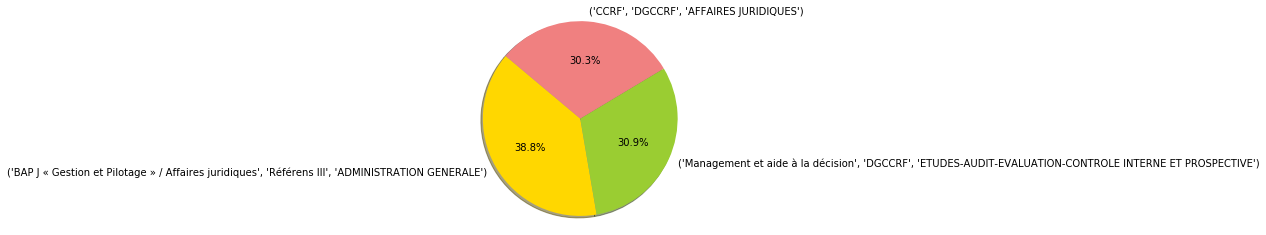

In [329]:
import matplotlib.pyplot as plt

# Data to plot
labels = [df_total['emploi'][code_emploi_dict[dist[0][1]]], 
          df_total['emploi'][code_emploi_dict[dist[1][1]]], df_total['emploi'][code_emploi_dict[dist[2][1]]] ]
sizes = [dist[0][0], dist[1][0], dist[2][0]]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes,  labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [330]:
df_total['emploi'][code_emploi_dict[dist[0][1]]]

('BAP J « Gestion et Pilotage » / Affaires juridiques',
 'Référens III',
 'ADMINISTRATION GENERALE')

In [331]:
df_total['competences'][code_emploi_dict[dist[0][1]]]

['tenir',
 'compte',
 'besoins',
 'contraintes',
 'savoir',
 'rendre',
 'compte',
 'elaborer',
 'fiches',
 'procedures',
 'encadrer',
 'animer',
 'equipe',
 'exploiter',
 'sources',
 'donnees',
 'utiliser',
 'outils',
 'bureautiques',
 'capacite',
 'ecoute',
 'capacite',
 'conviction',
 'rigueur',
 'fiabilite']

In [332]:
df_total['emploi'][code_emploi_dict[dist[1][1]]]

('Management et aide à la décision',
 'DGCCRF',
 'ETUDES-AUDIT-EVALUATION-CONTROLE INTERNE ET PROSPECTIVE')

In [333]:
df_total['competences'][code_emploi_dict[dist[1][1]]]

['analyser',
 'comportement',
 'contexte',
 'problematique',
 'communiquer',
 'concevoir',
 'projet',
 'demarche',
 'conseiller',
 'diagnostiquer',
 'autonomie',
 'capacite',
 'conviction',
 'capacite',
 'innovation',
 'creativite',
 'pedagogie',
 'sens',
 'relationnel']